In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("uber.csv")

In [36]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [37]:
df = df.drop(['Unnamed: 0', 'key'], axis = 1)

In [38]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [39]:
df['dropoff_longitude'].fillna(value = df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(value = df['dropoff_latitude'].mean(),inplace=True)

In [40]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [41]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [42]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
              day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
              year = df.pickup_datetime.dt.year,
              dayofweek = df.pickup_datetime.dt.dayofweek)

In [43]:
df = df.drop(['pickup_datetime'], axis = 1)

In [44]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

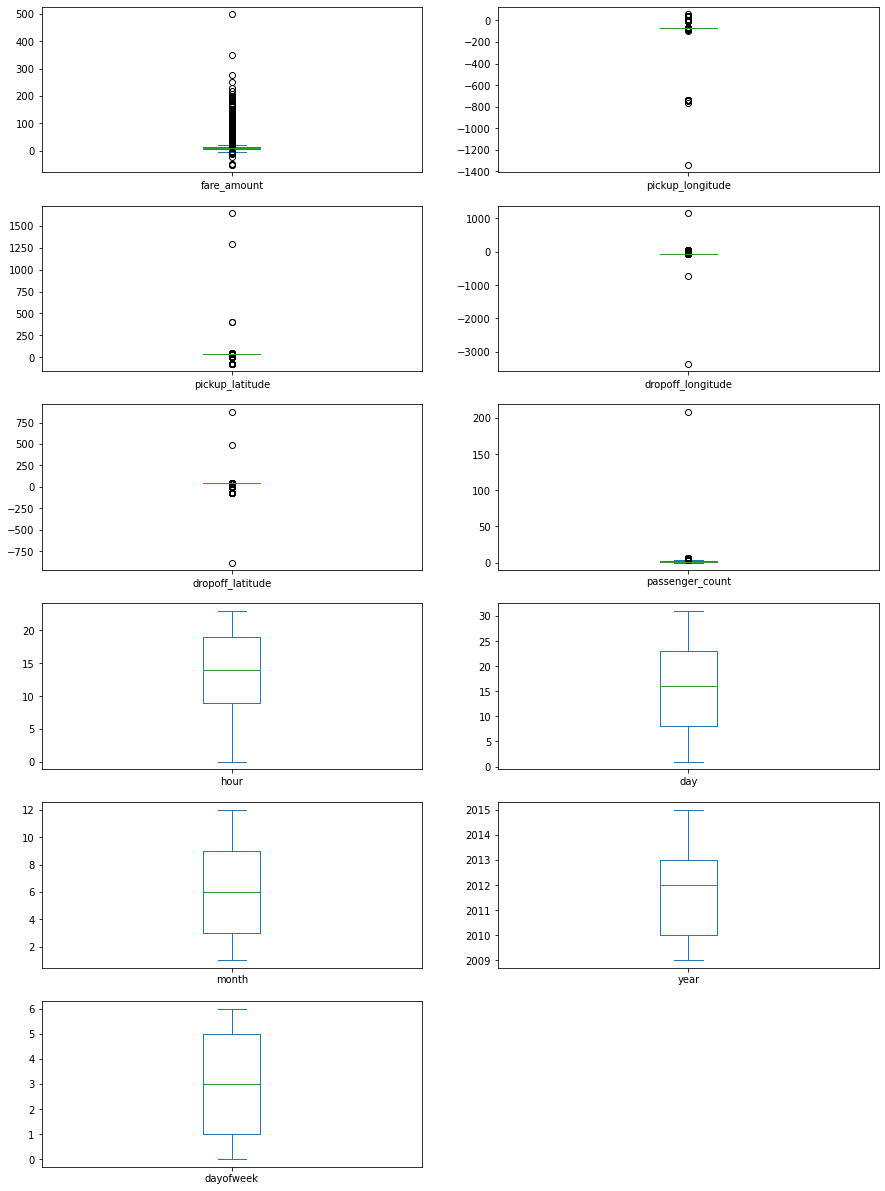

In [45]:
df.plot(kind='box', subplots=True, figsize=(15,25), layout=(7,2))

In [46]:
def remove_outliers(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    higher_whisker = Q3 + 1.5 * IQR 
    df[col] = np.clip(df1[col],lower_whisker,higher_whisker)
    return df1
def treat_outliers(df, cols_list):
    for c in cols_list:
        df1 = remove_outliers(df,c)
    return df1

In [47]:
df = treat_outliers(df , df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

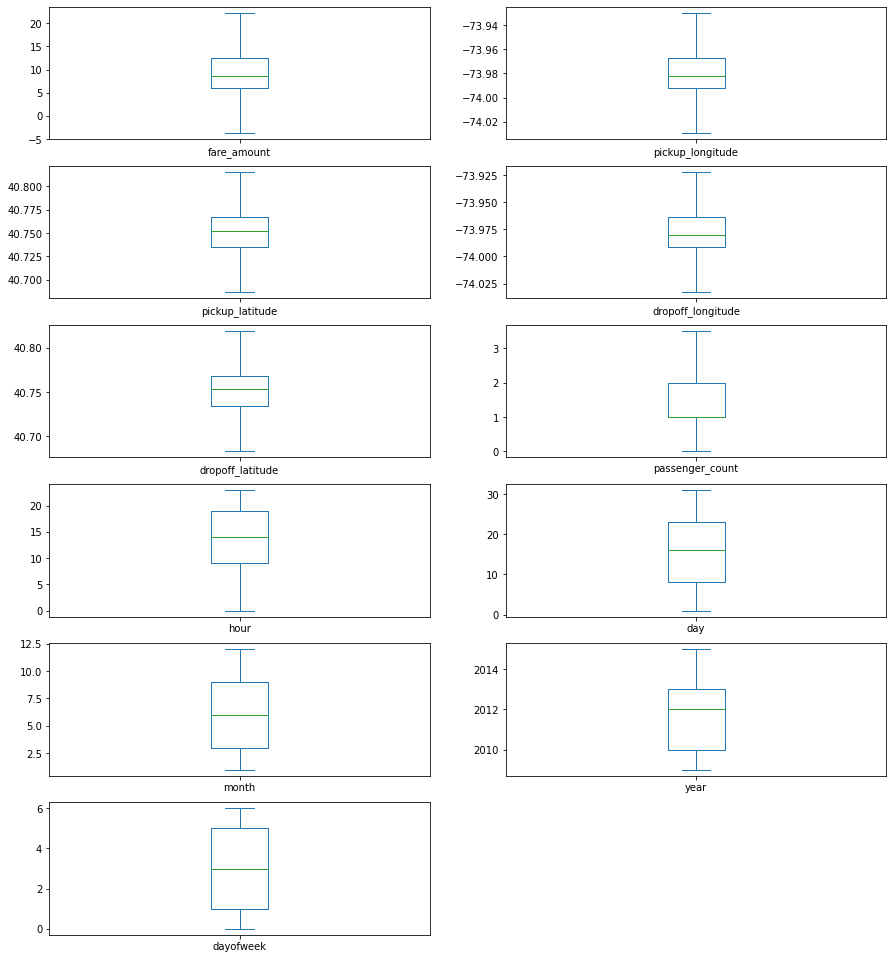

In [48]:
df.plot(kind='box', subplots = True, figsize = (15,20), layout = (7,2))

In [49]:
pip install haversine

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 1.3 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 KB 503.1 kB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [66]:
from geopy.distance import geodesic

# Step 1: Calculate Distance between Pickup and Dropoff Points
def haversine(lat1,long1, lat2,long2):
    return geodesic((lat1,long1), (lat2,long2)).km

In [67]:
# Apply the haversine function to create a new 'distance' column
df['distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], 
                                                row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [68]:
# Check the first few rows to ensure the distance column is created correctly
df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distance']].head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance
0,40.738354,-73.999817,40.723217,-73.999512,1.681111
1,40.728225,-73.994355,40.750325,-73.994710,2.454363
2,40.740770,-74.005043,40.772647,-73.962565,5.039603
3,40.790844,-73.976124,40.803349,-73.965316,1.661442
4,40.744085,-73.929786,40.761247,-73.973082,4.123172


In [69]:
# Step 2: Correlation Analysis
# Let's calculate and visualize the correlation matrix
corr_matrix = df[['fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 
                  'dropoff_longitude', 'passenger_count', 'hour', 'day', 'month', 'year', 
                  'dayofweek', 'distance']].corr()

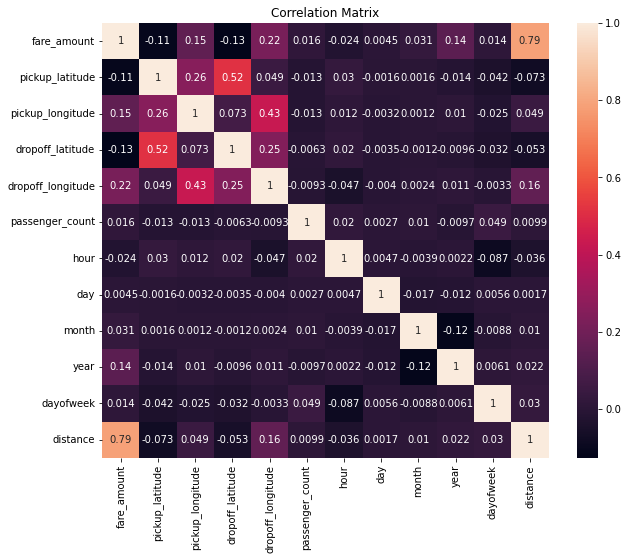

In [70]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [71]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [72]:
# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split
# Define features and target variable
X = df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 
        'passenger_count', 'hour', 'day', 'month', 'year', 'dayofweek', 'distance']]
y = df['fare_amount']

In [73]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Step 4: Model Building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [75]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
# Step 5: Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predict using Linear Regression
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [78]:
# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [79]:
# Display the evaluation results
print(f"Linear Regression - R²: {r2_lr:.4f}, RMSE: {rmse_lr:.4f}")
print(f"Random Forest - R²: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")

Linear Regression - R²: 0.6593, RMSE: 3.1838
Random Forest - R²: 0.7945, RMSE: 2.4729


In [81]:
# Step 6: Prediction Example
# Let's make predictions for a new sample ride
new_ride = pd.DataFrame({
    'pickup_latitude': [-73.97337],
    'pickup_longitude': [40.755193],
    'dropoff_latitude': [-73.978265],
    'dropoff_longitude': [40.766375],
    'passenger_count': [1],
    'hour': [14],
    'day': [15],
    'month': [11],
    'year': [2024],
    'dayofweek': [2],  # Monday
    'distance': [1.5]  # Example distance in km
})

# Predict fare for the new ride using both models
pred_lr = lr_model.predict(new_ride)
pred_rf = rf_model.predict(new_ride)

print(f"Predicted Fare (Random Forest): ${pred_rf[0]:.2f}")

Predicted Fare (Random Forest): $17.84
